# ADS, fall 2017. Homework 3

### Completed by Jon Kastelan (jlk635)

##### See below a view of standard incredibly awesome imports


In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import statsmodels as sm
%matplotlib inline
import scipy.stats
from mpl_toolkits.mplot3d import Axes3D


### Q1 (10 points). P-values and hypothesis testing
Suppose that a multiple regression with 10 regressors gave the following p-values for each of them (the value below are NOT in percents yet):

0.02, 0.1, 3e-15, 0.5, 0.04, 0.001, 0.06, 0.03, 0.045, 5e-3.

For how many regressors you would reject the null-hypothesis that their corresponding regression coefficient is zero? Please explain.

##### Answer:

Reject the null hypothesis if the p-value is less than critical value (size, $\alpha$). If $\alpha$ = 0.05, we would reject the null hypothesis for p-values equal to 0.02, 3e-15, 0.04, 0.001, 0.03, 0.045 and 5e-3. A total of 7 regressors are statistically significant in this model.

### Q2 (15 points). Confidence intervals
Assume we perform a regression and get an estimate 100 for the slope coefficient for the regressor of interest. Select all statements that can not be true for its confidence intervals:

a. 99%-conficence interval is [99.99,100.01]

**b. 95%-confidence interval is [-300, 300] - NOT TRUE**

**c. 98%-confidence interval is [95, 105], while 90%-confidence interval is [90, 110]. - NOT TRUE**

**d. 99%-confidence interval is [99,100] - NOT TRUE**

Explain your choices

##### Answer:

Part (a) is the only statement which may be true. 

Statements (b) and (c) are not true, because the centre of the confidence interval must be the estimate = 100, whereas the centre for statement (b) is 0, and the centre for statement (d) is 99.5. 

A larger % confidence interval must be wider than a smaller % confidence interval. For statement (c), the 90% confidence interval is wider than the 98% confidence interval, and this is contradiction. If you are 98% confident the true estimate is between 95 and 105, then you must be at least 98% confident the true estimate is between 90 and 110 (but the statement indicates we're only 90% confident of this - it is a contradication).

### Q3 (15 points). 

A linear regression model is fit over a dataset with 181 observations and 'n' features. The estimate for the regression coefficient for one of the features is 911.0964 while its standard error is 344.185.

What will be the 
a) 95, 99 and 90% confidence intervals? 
b) p-values?

#### Part (a)

Assume the number of features is less than ~80, and we still have an adequate number of degrees of freedom to use t-statistic with 100 degrees of freedom.

In [2]:
sigLevels = np.array([95.,99.,90.])

tValues = scipy.stats.t.ppf(0.5*(1-sigLevels/100), df=100)
zValues = np.array([1.960,2.575,1.645])
mean = 911.0964
standardError = 344.185

LowerCIt = mean + tValues * standardError
UpperCIt = mean - tValues * standardError

print("\nUsing a t-distribution with 100 degrees of freedom:")  
for i, lev in enumerate(sigLevels):
    print("The {}% confidence interval is between {} and {}".format(int(lev),round(LowerCIt[i],4),round(UpperCIt[i],4)))

    
LowerCIz = mean - zValues * standardError
UpperCIz = mean + zValues * standardError
    
print("\nCompare intervals using a normal approximation")    
for i, lev in enumerate(sigLevels):
    print("The {}% confidence interval is between {} and {}".format(int(lev),round(LowerCIz[i],4),round(UpperCIz[i],4)))

  


Using a t-distribution with 100 degrees of freedom:
The 95% confidence interval is between 228.2432 and 1593.9496
The 99% confidence interval is between 7.3043 and 1814.8885
The 90% confidence interval is between 339.6686 and 1482.5242

Compare intervals using a normal approximation
The 95% confidence interval is between 236.4938 and 1585.699
The 99% confidence interval is between 24.82 and 1797.3728
The 90% confidence interval is between 344.9121 and 1477.2807


The normal approximation provides a good estimate in this case, similar to the t-distribution (which is slightly more conservative with wider intervals).

#### Part (b)

In [3]:
testStat = (mean - 0) / standardError

pVal = 2 * (1 - scipy.stats.t.cdf(testStat, df=100))

print("The test statistic is {} with corresponding p-value {} (assuming t-distribution)".format(round(testStat,4), round(pVal,4)))

pValz = 2 * (1 - scipy.stats.norm.cdf(testStat))

print("Using a normal approximation, the corresponding p-value is {}".format(round(pValz,4)))


The test statistic is 2.6471 with corresponding p-value 0.0094 (assuming t-distribution)
Using a normal approximation, the corresponding p-value is 0.0081


### Q4.(ACS Data Set, 30pts)

We'll be using the ACS dataset provided below.

Survey:           ACS 2015 (5-Year Estimates)
Dataset:          Social Explorer Tables:  ACS 2015 (5-Year Estimates)

**VARIABLE DESCRIPTIONS:** (Data was collected in 2015)

Tables:

      1. Population Density (per Sq. Mile)
         Universe:  Total Population
         Name:      T2
         Variables:
            T002_001:   Total Population
            T002_002:   Population Density (Per Sq. Mile)
            T002_003:   Area (Land)


      2. Average Household Size
         Universe:  Occupied Households
         Name:      T21
         Variables:
            T021_001:   Average Household Size



      3. Median Household Income (In <DollarYear> Inflation Adjusted Dollars)
         Universe:  Households
         Name:      T57
         Variables:
            T057_001:   Median Household Income (In 2015 Inflation Adjusted Dollars)


      4. Per Capita Income (In <DollarYear> Inflation Adjusted Dollars)
         Universe:  Total Population
         Name:      T83
         Variables:
            T083_001:   Per Capita Income (In 2015 Inflation Adjusted Dollars)

 
      5. Median Gross Rent
          Universe:  Renter-occupied housing units paying cash rent
          Name:      T104
          Variables:
             T104_001:   Median Gross Rent


      6. Ratio of Income in 2015 to Poverty Level
          Universe:  Population for whom poverty status Is determined
          Name:      T117
          Variables:
             T117_001:   Population for Whom Poverty Status Is Determined:

      7. Average Commute to Work (in Min)
          Universe:  Average Commute to Work (in min)
          Name:      T147
          Variables:
             T147_001:   Average Commute to Work (in Min)


Run the regression modeling the median household income through all the features above and analyse its statistics. Based on the results, suppose X(s) is the predicted median household income for the household of the size s and if deltaX=X(s+1)-X(s) then calculate:
* (a) What's the expected price E(X)?
* (b) What's the probability that X > \$15000?  
* (c) What's the two-sided 80% confidence interval of X?
* (d) What's the one-sided 98% confidence interval of X? Calculate the upper interval $[X_0, +\infty)$,

In [4]:
df = pd.read_csv('file4.csv')
df.head()

,Unnamed: 0,Geo_FIPS,Geo_GEOID,Population_Density,Average_Household_Size,Median_Household_Income,Per_Capita_Income,Median_Value,Poverty_Status,Average_Commute_to_Work
0,2,36061000202,14000US36061000202,67374.02,2.15,29684.0,27355.0,533600.0,7768,31.0
1,4,36061000600,14000US36061000600,128089.30,2.92,19863.0,12802.0,521200.0,12378,30.0
2,5,36061000700,14000US36061000700,89695.05,1.92,117841.0,89303.0,1035900.0,8794,25.0
3,6,36061000800,14000US36061000800,112643.90,2.63,27137.0,17426.0,588100.0,9465,33.0
4,7,36061000900,14000US36061000900,12507.00,2.14,147500.0,111599.0,1000000.0,1626,26.0


In [5]:
dfIncome = df[[u'Population_Density', u'Average_Household_Size', u'Median_Household_Income',
       u'Per_Capita_Income', u'Median_Value', u'Poverty_Status',
       u'Average_Commute_to_Work']]

In [6]:
dfIncome.describe()

,Population_Density,Average_Household_Size,Median_Household_Income,Per_Capita_Income,Median_Value,Poverty_Status,Average_Commute_to_Work
count,229.000000,229.000000,229.000000,229.000000,2.290000e+02,229.000000,229.000000
mean,90755.473362,2.061179,92247.847162,76997.943231,9.050171e+05,5700.611354,29.720524
std,42321.602835,0.408588,47358.219256,46338.335513,4.672732e+05,2985.890788,5.784930
min,1857.859000,1.420000,19863.000000,10478.000000,5.470000e+04,126.000000,17.000000
25%,61473.520000,1.750000,50228.000000,35052.000000,5.551000e+05,3149.000000,25.000000
50%,90891.680000,1.980000,91776.000000,73889.000000,8.507000e+05,5241.000000,29.000000
75%,113735.200000,2.320000,120938.000000,108407.000000,1.080900e+06,7776.000000,34.000000
max,241752.300000,3.360000,250001.000000,254204.000000,2.000001e+06,16051.000000,45.000000


In [7]:
HHIncomeModelwIntercept = smf.ols("Median_Household_Income ~ Population_Density + Average_Household_Size + Per_Capita_Income + \
                                  Median_Value + Poverty_Status + Average_Commute_to_Work", data = dfIncome).fit()
HHIncomeModelwIntercept.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Median_Household_Income   R-squared:                       0.832
Model:                                 OLS   Adj. R-squared:                  0.827
Method:                      Least Squares   F-statistic:                     182.6
Date:                     Mon, 06 Nov 2017   Prob (F-statistic):           6.22e-83
Time:                             16:12:34   Log-Likelihood:                -2585.8
No. Observations:                      229   AIC:                             5186.
Df Residuals:                          222   BIC:                             5210.
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.535e+04   1.24e+04      1.234      0.219   -9165.448    3.99e+04
Population_Density          0.0318      0.041      0.768      0.443      -0.050       0.113
Average_Household_Size   1.121e+04   4621.474      2.426      0.016    2104.409    2.03e+04
Per_Capita_Income           0.9073      0.049     18.392      0.000       0.810       1.005
Median_Value                0.0043      0.004      1.085      0.279      -0.004       0.012
Poverty_Status             -0.8155      0.603     -1.353      0.177      -2.003       0.372
Average_Commute_to_Work  -612.3823    324.227     -1.889      0.060   -1251.338      26.574
==============================================================================
Omnibus:                       34.484   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.301
Skew:                           0.678   Prob(JB):                     4.95e-19
Kurtosis:                       5.645   Cond. No.                     9.98e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
dfIncome.head()

,Population_Density,Average_Household_Size,Median_Household_Income,Per_Capita_Income,Median_Value,Poverty_Status,Average_Commute_to_Work
0,67374.02,2.15,29684.0,27355.0,533600.0,7768,31.0
1,128089.30,2.92,19863.0,12802.0,521200.0,12378,30.0
2,89695.05,1.92,117841.0,89303.0,1035900.0,8794,25.0
3,112643.90,2.63,27137.0,17426.0,588100.0,9465,33.0
4,12507.00,2.14,147500.0,111599.0,1000000.0,1626,26.0


**(a) What's the expected price E(X)?**

In [9]:
HHIncomeModelwIntercept.params[1:]

Population_Density             0.031766
Average_Household_Size     11211.981640
Per_Capita_Income              0.907330
Median_Value                   0.004301
Poverty_Status                -0.815502
Average_Commute_to_Work     -612.382257
dtype: float64

In [10]:
dfIncomeRegressorsAvg = dfIncome[[u'Population_Density', u'Average_Household_Size',
                                  u'Per_Capita_Income', u'Median_Value', u'Poverty_Status',
                                  u'Average_Commute_to_Work']].mean()
AverageIncomePredict = np.dot(dfIncomeRegressorsAvg,HHIncomeModelwIntercept.params[1:]) + 1 * HHIncomeModelwIntercept.params[0]
print("The expected value of X, the median HH income is: ${}".format(round(AverageIncomePredict,4))) 

The expected value of X, the median HH income is: $92247.8472


**(b) What's the probability that X > $15000?**

Assume X follows a normal distribution.


In [11]:
ModelAvg = HHIncomeModelwIntercept.predict().mean()
ModelStd = HHIncomeModelwIntercept.predict().std()
print("The mean is ${} and standard deviation is ${}.".format(round(ModelAvg,4),round(ModelStd,4)))

The mean is $92247.8472 and standard deviation is $43090.0966.


In [22]:
LowerX = 15000
ProbLowerTS = (LowerX - ModelAvg) / ModelStd
ProbLowerP = 1 - scipy.stats.t.cdf(ProbLowerTS,df=222)

print("The probability X is greater than ${} is: {}%".format(LowerX, 100*round(ProbLowerP,4)))

The probability X is greater than $15000 is: 96.28%


**(c) What's the two-sided 80% confidence interval of X?**

In [13]:
Lower80 = round(ModelAvg + scipy.stats.t.ppf(.1, df=222) * ModelStd,4)
Upper80 = round(ModelAvg + scipy.stats.t.ppf(.9, df=222) * ModelStd,4)
print("The two-sided 80% confidence interval for X is: [${}, ${}]".format(Lower80, Upper80))


The two-sided 80% confidence interval for X is: [$36860.8445, $147634.8498]



**(d) What's the one-sided 98% confidence interval of X? Calculate the upper interval  [$X_0$,+$\infty$)**

In [14]:
Lower98onetail = round(ModelAvg + scipy.stats.t.ppf(.02, df=222) * ModelStd,4)
print("The one-sided 98% confidence interval estimate for X (Lower bound X0) is: ${}".format(Lower98onetail))

The one-sided 98% confidence interval estimate for X (Lower bound X0) is: $3228.6093


In [15]:
scipy.stats.norm.ppf(.02)

-2.053748910631823

### Q5 (30 points). Data visualization using PCA
We'll be using the breast cancer dataset from sklearn for this problem.

a) For the given labeled data perform PCA and visualize (using bar-plot) the fraction of variance explained by each principle components.

b) Visualize the observations along the first two principle components with colors depending on the label.

In [16]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

In [17]:
print X.shape, len(y)

(569L, 30L) 569


In [18]:
Xn=X
for i in range(X.shape[1]):
    Xn[:,i]=(X[:,i] - X[:,i].mean())/X[:,i].std()

**a) For the given labeled data perform PCA and visualize (using bar-plot) the fraction of variance explained by each principle components.**

[ 0.44272026  0.18971182  0.09393163  0.06602135  0.05495768  0.04024522
  0.02250734  0.01588724  0.01389649  0.01168978]


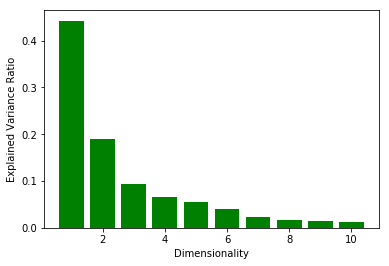

In [19]:
n=10 # how many eigenvectors we choose
pca = PCA(n)
Xproj = pca.fit_transform(Xn)
eigenvalues = pca.explained_variance_ratio_
print pca.explained_variance_ratio_
plt.bar(np.arange(n)+1, eigenvalues, color='Green');
plt.xlabel("Dimensionality")
plt.ylabel("Explained Variance Ratio")
plt.show()

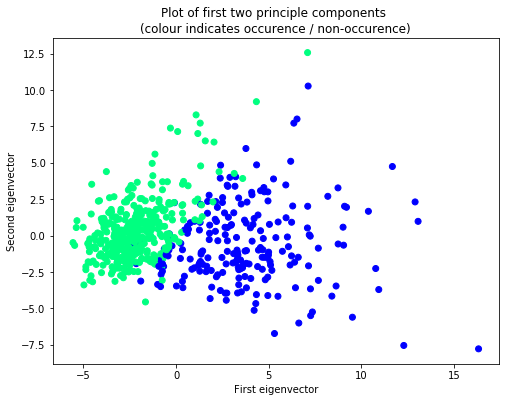

In [20]:
plt.figure(2, figsize=(8, 6))
plt.clf()
# Plot the training points
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, cmap=plt.cm.winter)
plt.title("Plot of first two principle components \n(colour indicates occurence / non-occurence)")
plt.xlabel('First eigenvector')
plt.ylabel('Second eigenvector')
plt.show()

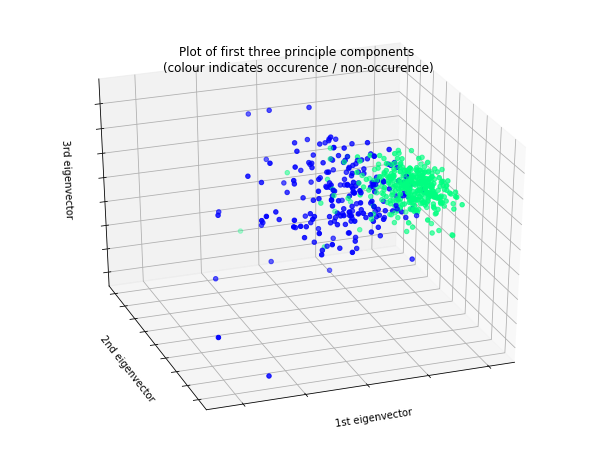

In [21]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(Xproj[:, 0], Xproj[:, 1], Xproj[:, 2], c=y,
           cmap=plt.cm.winter)
ax.set_title("First three PCs")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.title("Plot of first three principle components \n(colour indicates occurence / non-occurence)")

plt.show()